# What are the best markets to advertise in?

Let's assume that we're working for an an e-learning company that offers courses on programming. Most of our courses are on web and mobile development, but we also cover many other domains, like data science, game development, etc. We want to promote our product and we'd like to invest some money in advertisement. Our goal in this project is to find out the two best markets to advertise our product in.

<h3>Data</h3>

The data used in this project will be from a survey by [freeCodeCamp](https://www.freecodecamp.org/), an online learning platform that offers courses on programming. The specific survey is the [freeCodeCamp's 2018 New Coder Survey.](https://www.freecodecamp.org/news/we-asked-20-000-people-who-they-are-and-how-theyre-learning-to-code-fff5d668969/) and the dataset can be found on [their GitHub repository](https://github.com/freeCodeCamp/2017-new-coder-survey).

<h3>Library import</h3>


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

#magic line
%matplotlib inline

# to avoid display of truncated columns 
pd.options.display.max_columns = 140
pd.options.display.max_colwidth = 50

In [3]:
# read data 
# specified low_memory=False because of the warning "DtypeWarning: Columns (17,62) have mixed types"
free_df = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv',encoding = 'latin-1', low_memory=False)

It's always helpful to take a first look at the dataset by e.g. looking at the first rows, number of rows and columns, column names etc.

In [4]:
# print 5 rows of dataset
free_df.head(5)

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,Canada,Canada,software development and IT,NaN,Employed for wages,NaN,NaN,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,NaN,15.0,02d9465b21e8bd09374b0066fb2d5614,eb78c1c3ac6cd9052aec557065070fbf,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,start your own business,NaN,NaN,NaN,English,married or domestic partnership,150.0,6.0,6f1fbc6b2b,2017-03-09 00:36:22,2017-03-09 00:32:59,2017-03-09 00:59:46,2017-03-09 00:36:26,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working but looking for work,NaN,35000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,NaN,10.0,5bfef9ecb211ec4f518cfc1d2a6f3e0c,21db37adb60cdcafadfa7dca1b13b6b1,NaN,0.0,0.0,0.0,NaN,Within 7 to 12 months,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work for a nonprofit,1.0,Full-Stack Web Developer,in an office with other developers,English,"single, never married",80.0,6.0,f8f8be6910,2017-03-09 00:37:07,2017-03-09 00:33:26,2017-03-09 00:38:59,2017-03-09 00:37:10,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,

In [5]:
print('Total number of rows: ', free_df.shape[0])
print('Total number of columns: ', free_df.shape[1])

Total number of rows:  18175
Total number of columns:  136


We can see that there are a lot of different columns; it is likely that only a handful of those will track data that is relevant to this project however. Further on we will try and find which are relevant to us and discard the rest.

First, however, we note that lots of rows that have a null value. It would be interesting to see just how common this behavior is in our dataset.

In [6]:
round(free_df.isnull().sum()*100/len(free_df),0)


Age                       15.0
AttendedBootcamp           3.0
BootcampFinish            94.0
BootcampLoanYesNo         94.0
BootcampName              95.0
BootcampRecommend         94.0
ChildrenNumber            87.0
CityPopulation            16.0
CodeEventConferences      91.0
CodeEventDjangoGirls      99.0
CodeEventFCC              91.0
CodeEventGameJam          98.0
CodeEventGirlDev          98.0
CodeEventHackathons       89.0
CodeEventMeetup           86.0
CodeEventNodeSchool       98.0
CodeEventNone             94.0
CodeEventOther            97.0
CodeEventRailsBridge      99.0
CodeEventRailsGirls       99.0
CodeEventStartUpWknd      97.0
CodeEventWkdBootcamps     97.0
CodeEventWomenCode        97.0
CodeEventWorkshops        90.0
CommuteTime               49.0
CountryCitizen            15.0
CountryLive               16.0
EmploymentField           55.0
EmploymentFieldOther      94.0
EmploymentStatus          21.0
                          ... 
ResourceMDN               65.0
Resource

As we can see there is a rather large number of columns that present a high percentage of null values.  Below is a chart of the null values in our dataset.  

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:1428: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



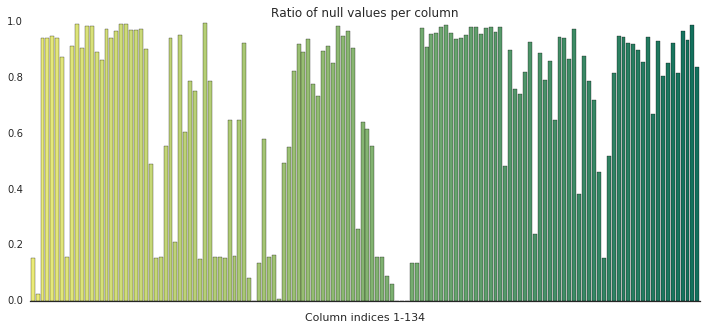

In [7]:
# set seaborn background to white
sns.set_style('white')

# null values plot
fig, ax = plt.subplots(figsize = (12,5))
sns.barplot(x = free_df.columns, y = (free_df.isnull().sum()/free_df.shape[0]), ax=ax, palette='summer_r')
ax.set_xticklabels([])
ax.set_xlabel('Column indices 1-134')
ax.set_xticks([False])
ax.set_title('Ratio of null values per column')
sns.despine(top=True, left=True, right=True)
plt.show()

<h3>Relevant columns</h3>

For the purpose of this analyis, we would like to answer a series of questions about a a population of new coders that are interested in the subjects freeCodeCamp teaches. Theese questions are:


- Where are these new coders located
- Locations with the greatest number of new coders
- How much money are they willing to spend on learning
- Preferred language for communication and/or some related information

In [8]:
# to print whole length of job role interest column
pd.options.display.max_colwidth = 120

print('Sample of rows from \'JobRoleInterest\' column', '\n')
print(free_df.JobRoleInterest.head())

pd.options.display.max_colwidth = 50

Sample of rows from 'JobRoleInterest' column 

0                                                                                                                      NaN
1                                                                                                 Full-Stack Web Developer
2       Front-End Web Developer, Back-End Web Developer,   DevOps / SysAdmin,   Mobile Developer, Full-Stack Web Developer
3                                                Front-End Web Developer, Full-Stack Web Developer, Back-End Web Developer
4    Full-Stack Web Developer, Information Security,   Mobile Developer,   Front-End Web Developer, Back-End Web Developer
Name: JobRoleInterest, dtype: object


We can see that again some of the rows have a null value and if we look at more values through the dataset we can observe some inconsistencies that could make the frequency distribution not properly reflect the answers. Exmaples of this could be the use of "software developer" and "software development" or the use of uppercase and lowercase interchangeably. We then need to try and make the answers as consistent as possible.  

In [9]:
def transform(row):
    roles = []
    if row is not np.nan:
        for value in row.split(','):
            roles.append(value.replace(r'  ',' ').replace('-', ' ').replace('development', 'developer').strip().lower())
        row = roles
    return row

free_df.JobRoleInterest = free_df.JobRoleInterest.apply(transform)
print('Sample of rows from \'JobRoleInterest\' column after applying \'transform\' function', '\n')

print(free_df.JobRoleInterest.head())           
    
        

Sample of rows from 'JobRoleInterest' column after applying 'transform' function 

0                                                  NaN
1                           [full stack web developer]
2    [front end web developer, back end web develop...
3    [front end web developer, full stack web devel...
4    [full stack web developer, information securit...
Name: JobRoleInterest, dtype: object


In [10]:
'''
freq. distribution table for number of roles each coder would be interested in
'''
roles_per_coder = (
    free_df.JobRoleInterest.apply(lambda x: len(x)
                                   if x is not np.nan else np.nan).value_counts(normalize=True))*100
roles_per_coder = roles_per_coder.round(2)

'''
freq. distribution table for number of times each course has been selected
'''

roles = {} #dictionary for all different roles

for row in free_df.JobRoleInterest:
    if row is not np.nan:
        for value in row:
            if value in roles:
                roles[value] += 1
            else:
                roles[value] = 1
                

# create dataframe from dictionary

roles_df = pd.DataFrame(list(roles.items()), columns=['Roles', 'Count'])
roles_df['Count %'] = (roles_df.Count/roles_df.Count.sum())*100 # create new column with % for each role
roles_df = roles_df.sort_values('Count %', ascending=False).round(2) # sort from highest to lowest count

print('Frequency distribution table for number of roles that students want in percentage terms:',
      '\n'*2, roles_per_coder, '\n'*2, 
      'Top roles students are interested in:','\n'*2,       
      roles_df.head())

Frequency distribution table for number of roles that students want in percentage terms: 

 1.0     31.65
3.0     15.89
4.0     15.22
5.0     12.04
2.0     10.88
6.0      6.72
7.0      3.86
8.0      1.76
9.0      0.99
10.0     0.47
12.0     0.30
11.0     0.19
13.0     0.03
Name: JobRoleInterest, dtype: float64 

 Top roles students are interested in: 

                         Roles  Count  Count %
134  full stack web developer   4198    18.58
177   front end web developer   3533    15.63
175    back end web developer   2772    12.27
80           mobile developer   2305    10.20
116            data scientist   1643     7.27


We can see that the majority of students are interested in between 1 to 5 different courses and that the roles most desired are: full stack, front, and back web developer; mobile developer; and data scientist. It would help however to visualize this information graphically.

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:1428: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



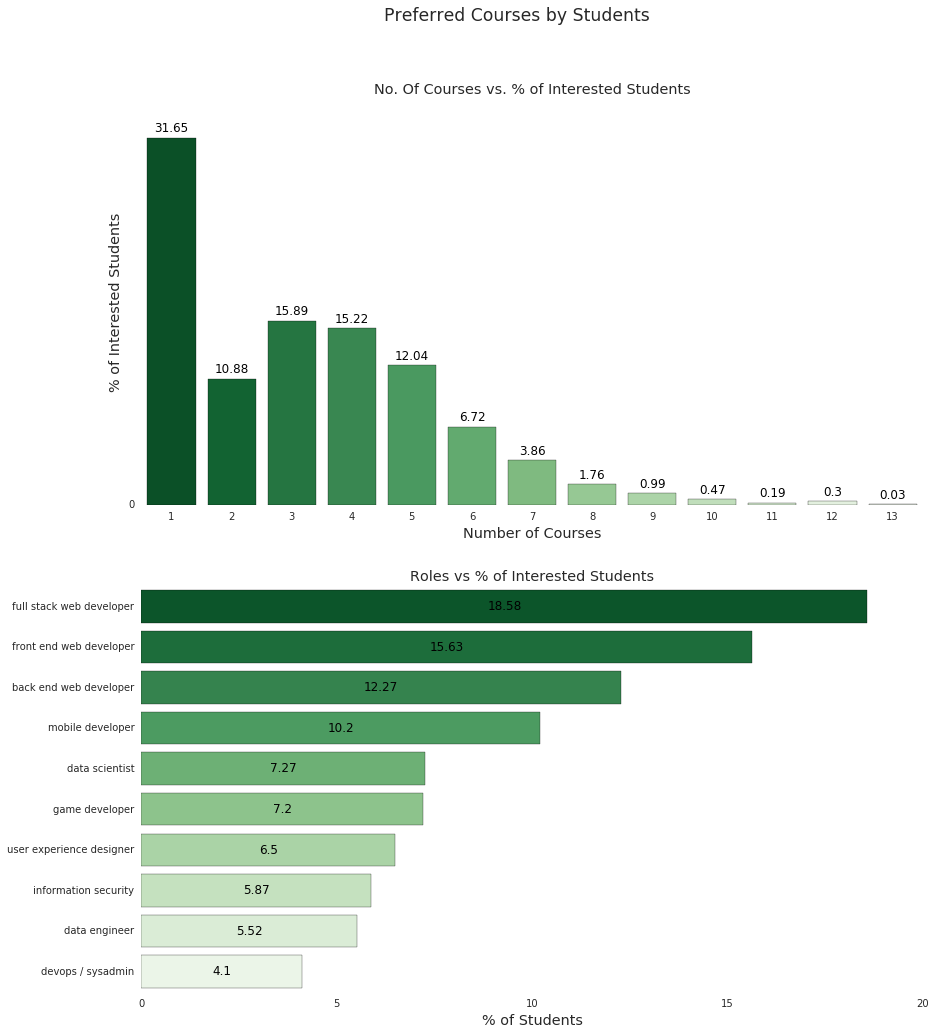

In [76]:
# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(14,16))
fig.suptitle('Preferred Courses by Students ', fontsize="xx-large")


# plot number of courses per coder
sns.barplot(x = roles_per_coder.index.astype(int), y = roles_per_coder, ax = ax1, palette = 'Greens_r')
ax1.set_ylabel("% of Interested Students", fontsize="x-large")
ax1.set_yticks([False])
ax1.set_xlabel("Number of Courses", fontsize="x-large")
ax1.set_title("No. Of Courses vs. % of Interested Students", fontsize = 'x-large')

# add precise % of students atop each bar
for i, r in roles_per_coder.items():
    ax1.text(i-1, r+0.5, r, color='black', ha='center', fontsize='large')

# plot roles most desired by students
sns.barplot(y = 'Roles', x = 'Count %', data = roles_df[:10], palette = 'Greens_r', ax=ax2)
ax2.set_ylabel("", fontsize="x-large")
ax2.set_xlabel("% of Students", fontsize="x-large")
ax2.set_title("Roles vs % of Interested Students", fontsize = "x-large")

# add precise % of students inside each bar
for p in ax2.patches:
    w, h = p.get_width(), p.get_height()
    ax2.text(w*0.5, p.get_y()+0.5*h, w, ha='center', va='center', 
             fontsize='large', color='black')

sns.despine(top=True, right=True, left=True, bottom=True)

plt.show()

yada yada yada

To answer: 

- Are people interested in only one subject or they can be interested in more than one subject?
- If most people are interested in more than one subject, is this sample still representative?

<h3>Web and mobile development</h3>

Since the focus of the customer's courses is on web and mobile development, it would be interesting to see how many students are interested in these two subjects. For this purpose we will consider full stack, front end and back end as a same group of web developers.  

In [12]:
def print_barhplot(series, title, xlabel, yticklabels):
    fig, ax = plt.subplots(figsize=(10,3))
    series.plot.barh()
    ax.set_title(title, size=24)
    ax.tick_params(axis='both', labelsize=16, left=False)
    ax.set_xlabel(xlabel)
    ax.set_yticklabels(yticklabels)
    for side in ['top', 'right', 'left', 'bottom']:
            ax.spines[side].set_visible(False)
    plt.show()

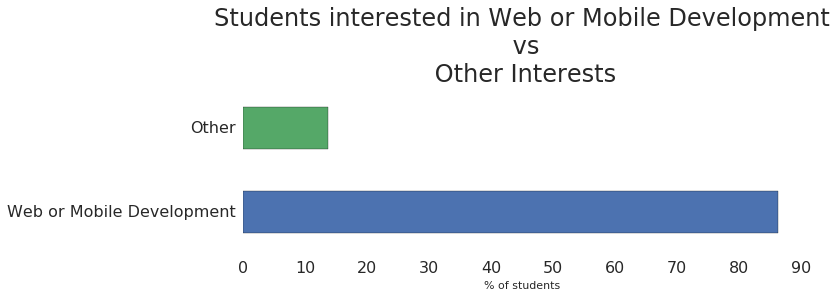

In [13]:
free_df = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv',encoding = 'latin-1', low_memory=False)

web_mob_dev = free_df['JobRoleInterest'].str.contains('Web Developer|Mobile Developer')

# Counting and visualizing % of the respondents interested in web or mobile developer roles
freq_web_mob_dev = web_mob_dev.value_counts(normalize=True)*100
print_barhplot(title='Students interested in Web or Mobile Development\n vs\n Other Interests',
              series=freq_web_mob_dev, 
              xlabel='% of students',
              yticklabels=['Web or Mobile Development','Other'])

yada yada yada

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:1428: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



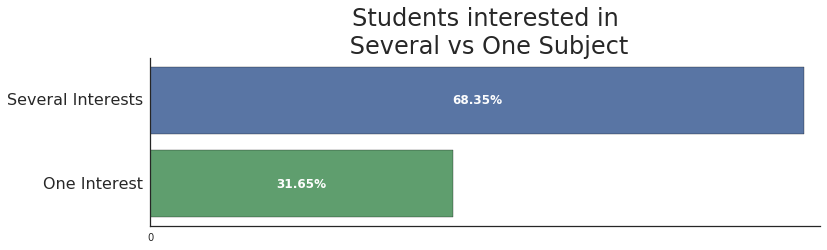

In [92]:
# Split each string in the 'JobRoleInterest' column
roles = free_df['JobRoleInterest'].dropna().str.split(',')
roles_nr = roles.apply(lambda x: 
                      'Several interests' if len(x)>1
                      else 'One interest')

fig, ax = plt.subplots(figsize=(12, 3))
sns.barplot(ax=ax, x=roles_nr.value_counts(normalize=True)*100, 
           y=roles_nr.value_counts(normalize=True).index)
for p in ax.patches:
    w, h = p.get_width(), p.get_height()
    ax.text(w*0.5, p.get_y()+0.5*h, str(round(w,2))+'%',
               ha='center', va='center', fontsize='large', 
            color='white', fontweight='bold')
ax.set_title('Students interested in\n Several vs One Subject', fontsize=24)
ax.set_yticklabels(['Several Interests','One Interest'], fontsize=16)
ax.set_xlabel('')
ax.set_xticks([False])
sns.despine()
plt.show()

yada yada


## Best Markets by Country

Generate a frequency table for the CountryLive variable.
- Generate both absolute and relative frequencies.
- Analyze the results.
- Based on the results, what are the two markets you'd choose for advertisement?
- Can we stop the analysis here, or we need to go more in depth?



In [38]:
free_df = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv',encoding = 'latin-1', low_memory=False)
free_df = free_df[free_df['JobRoleInterest'].notnull()].copy()

freq_abs = free_df['CountryLive'].value_counts(normalize=False)
freq_rel =  free_df['CountryLive'].value_counts(normalize=True)*100 
d = {'Absolute Frequency' : freq_abs, 'Relative Frequency' : freq_rel}
df = pd.DataFrame(data=d)

print('Total number of countries that students come from: ' , df.shape[0])

Total number of countries that students come from:  137


Since the number of countries is rather high, we will only look into the countries that at least 1% of the total number of students come from. 

In [84]:
plus1 = df[df['Relative Frequency'] > 1].round(2) 
print('\nTable for countries with at least 1% of total number of students\n\n',
      df[df['Relative Frequency'] > 1].round(2) )


Table for countries with at least 1% of total number of students

                           Absolute Frequency  Relative Frequency
United States of America                3125               45.70
India                                    528                7.72
United Kingdom                           315                4.61
Canada                                   260                3.80
Poland                                   131                1.92
Brazil                                   129                1.89
Germany                                  125                1.83
Australia                                112                1.64
Russia                                   102                1.49
Ukraine                                   89                1.30
Nigeria                                   84                1.23
Spain                                     77                1.13
France                                    75                1.10
Romania               

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:1428: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



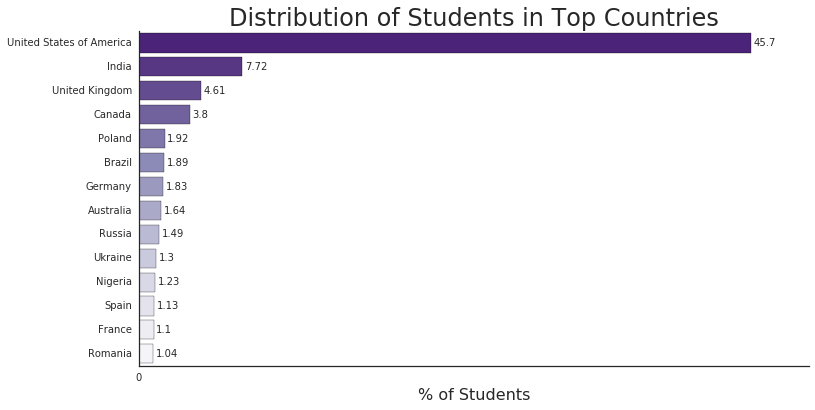

In [98]:
fig, ax = plt.subplots(figsize=(12,6))
sns.barplot(y = plus1['Relative Frequency'].index, x = plus1['Relative Frequency'].values, 
            palette = 'Purples_r', ax=ax)
for p in ax.patches:
    h, w = p.get_height(), p.get_width()
    ax.text(x = w+0.2, y = p.get_y()+0.5*h, s = w, va='center', ha='left')
ax.set_title('Distribution of Students in Top Countries', fontsize=24)
ax.set_xlabel('% of Students', fontsize=16)
ax.set_xticks([False])
sns.despine()
plt.show()   
sns.despine()
plt.show()


US yada yada

## Money

In [24]:
bool('web' in roles_df.Roles.iloc[0])

True